In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
import ast
from IPython.display import clear_output
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('train_ml.csv')

In [3]:
data

,bank,feeds,grades,date
0,ubrr,"Много лет являюсь клиентом этого банка, но пос...",1.0,16.02.2017 16:10
1,fk_otkritie,"Г. Ростов-на-Дону, ул. Ленина, 48. Были 10.12....",2.0,13.12.2016 1:05
2,alfabank,Здравствуйте!Ранее уже оставлял отзыв о вашем ...,NaN,28.06.2019 13:54
3,vtb,Обращаюсь к Вам с жалобой на незаконное списан...,NaN,15.07.2020 14:54
4,promsvyazbank,"Имею потребительский кредит, взятый в Связь-ба...",2.0,04.08.2020 6:38
...,...,...,...,...
74995,trust,Три года длится эпопея с закрытием кредитной к...,1.0,26.10.2016 11:03
74996,fk_otkritie,"Являлся клиентом Бинбанка, пока после слияния ...",2.0,01.02.2020 21:07
74997,sberbank,8 мая 2016 г. мною вносились деньги на банковс...,1.0,14.06.2016 16:03
74998,uralsib,Здравствуйте! Сегодня 21.04.2020 захожу в моби...,3.0,21.04.2020 8:24


# Дропнем NaNы в оценках

In [4]:
data = data[data['grades'].notna()]

In [5]:
data['grades'].isna().sum()

0

<AxesSubplot:xlabel='grades', ylabel='Count'>

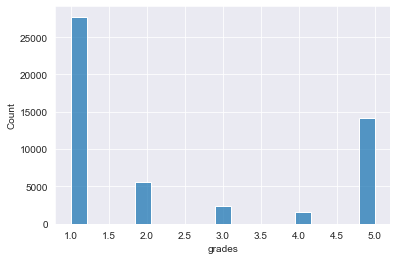

In [6]:
sns.histplot(data=data, x='grades')

# Собираем словарь, считаем самые важные слова для каждого из классов

In [128]:
data['feeds']

0        Много лет являюсь клиентом этого банка, но пос...
1        Г. Ростов-на-Дону, ул. Ленина, 48. Были 10.12....
4        Имею потребительский кредит, взятый в Связь-ба...
7        Хочу выразить глубокую благодарность всем сотр...
8        6 марта 2019г. В 10:33 при проходе в метро "Ку...
                               ...                        
74995    Три года длится эпопея с закрытием кредитной к...
74996    Являлся клиентом Бинбанка, пока после слияния ...
74997    8 мая 2016 г. мною вносились деньги на банковс...
74998    Здравствуйте! Сегодня 21.04.2020 захожу в моби...
74999    Уважаемое руководство банка!Если все услуги ва...
Name: feeds, Length: 51476, dtype: object

In [135]:
data['feeds'].str.contains(' остов')

0        False
1        False
4        False
7        False
8        False
         ...  
74995    False
74996    False
74997    False
74998    False
74999    False
Name: feeds, Length: 51476, dtype: bool

In [164]:
vectorizer = CountVectorizer(max_df=0.95, min_df=0.05)
bag_of_words = vectorizer.fit_transform(data['feeds'])

KeyboardInterrupt: 

In [87]:
word_feature_names = vectorizer.get_feature_names_out()

In [91]:
np.array(vectorizer.stop_words_)

array({'критическим', 'предъявляешь', '66618022877', 'интеллигентное', 'комплиментом', 'заглядывали', 'собрала', 'веских', 'koryukina_natash', 'давятся', '156076руб', 'придуриваются', 'числишься', '924', 'доверились', 'необязательных', 'яснение', 'объединились', 'скрытый', 'груды', 'кланяться', 'голосок', 'зина', 'рассмотрите', 'message1698289', 'начинающихся', 'нарушенным', 'yл', 'утрачен', 'анонимно', 'полу', 'разбираетесь', 'накрывать', 'мууу', 'наглым', 'двухгодичного', 'косячу', '8802000981', 'непродолжительное', 'задаром', 'аванс', 'кадашевская', 'преподнесена', 'доктор', 'освещением', 'viewtopic', '9805', 'правовой', 'ораторам', 'компьютер', 'рубцовых', 'поделен', 'уточнили', 'обеспечивающую', 'объедены', 'каждые', 'руководителюсектора', 'плачевным', 'чихе', 'краснеете', 'вставайте', 'кoлл', '0820', 'тамошнее', 'естественноих', 'krd', 'жалобе', '014', 'возражаю', 'вынудившую', '200921', 'рузалии', 'большенство', 'парашютная', 'уточнение', 'весною', 'расмотренные', '1501', 'девич

In [143]:
grade4_specific_words = data['feeds'].str.split().explode().value_counts()

In [160]:
np.quantile(grade4_specific_words, 0.99)

165.0

In [157]:
grade4_specific_words[(grade4_specific_words > 2) & (grade4_specific_words > 2)]

в                306315
и                266834
не               210385
на               168575
что              153827
                  ...  
призывом              3
воплощать             3
(приобретение         3
усмехнулась,          3
подчас                3
Name: feeds, Length: 121568, dtype: int64

In [95]:
np.sum(np.flatnonzero(np.core.defchararray.find(data['feeds'][:10], 'литейный') != -1))

TypeError: string operation on non-string array

# Смотрим средние оценки по банкам

In [48]:
bank_mean_review = data.groupby('bank')['grades'].agg('mean').sort_values().to_dict()

In [197]:
bank_mean_review['pochtabank']

2.681840430739109

# Обучение

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from category_encoders.target_encoder import TargetEncoder
from tqdm.notebook import tqdm
from sklearn.svm import SVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [227]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['grades'], axis=1), data['grades'], test_size=0.25, stratify=data['grades'])

max_f1 = 0
best_min_samples_leaf = None
f1_scores_for_min_samples_leaf = []
for C in tqdm(np.logspace(0, 3, 20)):
    column_transformer = ColumnTransformer([
        ("tfidf", TfidfVectorizer(max_df=0.8, min_df=0.05), 'feeds'),
        ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
    ])

    X_train_trans = column_transformer.fit_transform(X_train, y_train)
    X_test_trans = column_transformer.transform(X_test)
    clf = LogisticRegression(C=C, max_iter=1000)
    # clf = GradientBoostingClassifier()
    clf.fit(X_train_trans, y_train)
    y_pred = clf.predict(X_test_trans)
    f1_cur = f1_score(y_test, y_pred, average='micro')
    if f1_cur > max_f1:
        max_f1 = f1_cur
        best_min_samples_leaf = C
    f1_scores_for_min_samples_leaf.append(f1_cur)

  0%|          | 0/20 [00:00<?, ?it/s]

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-pac

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/t2/34r46m591pjdzygk6yq8vrs80000gn/T/ipykernel_49231/3034194106.py", line 17, in <cell line: 7>
    clf.fit(X_train_trans, y_train)
  File "/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1589, in fit
    fold_coefs_ = Parallel(
  File "/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Users/yaksenov/

In [ ]:
plt.plot(f1_scores_for_min_samples_leaf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['grades'], axis=1), data['grades'], test_size=0.25, stratify=data['grades'])

max_f1 = 0
best_min_samples_leaf = None
f1_scores_for_min_samples_leaf = []
for C in tqdm(np.logspace(0, 3, 20)):
    column_transformer = ColumnTransformer([
        ("tfidf", TfidfVectorizer(max_df=0.8, min_df=0.05), 'feeds'),
        ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
    ])

    X_train_trans = column_transformer.fit_transform(X_train, y_train)
    X_test_trans = column_transformer.transform(X_test)
    clf = LogisticRegression(C=C, max_iter=1000)
    # clf = GradientBoostingClassifier()
    clf.fit(X_train_trans, y_train)
    y_pred = clf.predict(X_test_trans)
    f1_cur = f1_score(y_test, y_pred, average='micro')
    if f1_cur > max_f1:
        max_f1 = f1_cur
        best_min_samples_leaf = C
    f1_scores_for_min_samples_leaf.append(f1_cur)

In [9]:
column_transformer = ColumnTransformer([
    ("tfidf", TfidfVectorizer(max_df=0.9, min_df=0.05), 'feeds'),
    ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
])
X_train, X_test, y_train, y_test = train_test_split(data.drop(['grades'], axis=1), data['grades'], test_size=0.25, random_state=42, stratify=data['grades'])
f1_scores = []
for C in tqdm(np.logspace(-4, 2, 6)):
    X_train_trans = column_transformer.fit_transform(X_train, y_train)
    X_test_trans = column_transformer.transform(X_test)
    clf = LinearSVC(C=6)
    clf.fit(X_train_trans, y_train)
    y_pred = clf.predict(X_test_trans)
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-pac

In [15]:
6.30957344e+00

6.30957344

In [13]:
np.logspace(-4, 2, 6)

array([1.00000000e-04, 1.58489319e-03, 2.51188643e-02, 3.98107171e-01,
       6.30957344e+00, 1.00000000e+02])

In [25]:
column_transformer = ColumnTransformer([
    ("tfidf", TfidfVectorizer(), 'feeds'),
    ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
])
X_train, X_test, y_train, y_test = train_test_split(data.drop(['grades'], axis=1), data['grades'], test_size=0.25, random_state=42, stratify=data['grades'])

X_train_trans = column_transformer.fit_transform(X_train, y_train)
X_test_trans = column_transformer.transform(X_test)

calibLinearSVC = CalibratedClassifierCV(LinearSVC(C=6), cv=5)
calibLinearSVC.fit(X_train_trans, y_train)

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.

CalibratedClassifierCV(base_estimator=LinearSVC(C=6), cv=5)

In [30]:
y_pred = calibLinearSVC.predict(X_test_trans)
f1_score(y_test, y_pred, average='micro')

0.7858419457611313

0.764 с 0.9, 0.05

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
column_transformer = ColumnTransformer([
    ("tfidf", TfidfVectorizer(), 'feeds'),
    ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
])
X_train, X_test, y_train, y_test = train_test_split(data.drop(['grades'], axis=1), data['grades'], test_size=0.25, random_state=42, stratify=data['grades'])

X_train_trans = column_transformer.fit_transform(X_train, y_train)
X_test_trans = column_transformer.transform(X_test)

calibLinearSVC = CalibratedClassifierCV(DecisionTreeClassifier(), cv=5)
calibLinearSVC.fit(X_train_trans, y_train)
y_pred = calibLinearSVC.predict(X_test_trans)
f1_score(y_test, y_pred, average='micro')

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.7385966275545885

In [34]:
column_transformer = ColumnTransformer([
    ("tfidf", TfidfVectorizer(), 'feeds'),
    ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
])
X_train, X_test, y_train, y_test = train_test_split(data.drop(['grades'], axis=1), data['grades'], test_size=0.25, random_state=42, stratify=data['grades'])

X_train_trans = column_transformer.fit_transform(X_train, y_train)
X_test_trans = column_transformer.transform(X_test)

calibLinearForest = CalibratedClassifierCV(LinearSVC(), cv=5)
calibLinearForest.fit(X_train_trans, y_train)
y_pred = calibLinearForest.predict(X_test_trans)
f1_score(y_test, y_pred, average='micro')

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.770922371590644

# Пробуем заполнить пропуски в данных

In [209]:
data = pd.read_csv('train_ml.csv')

In [210]:
data['grades'].isna().sum()

23524

In [212]:
from sklearn.neighbors import KNeighborsClassifier

In [213]:
column_transformer = ColumnTransformer([
    ("tfidf", TfidfVectorizer(), 'feeds'),
    ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
])

data_no_nans = data[data['grades'].notna()]

knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn_X = data_no_nans.drop(['grades'], axis=1)
knn_y = data_no_nans['grades']
knn_X = column_transformer.fit_transform(knn_X, knn_y)

knn.fit(knn_X, knn_y)

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


KNeighborsClassifier(n_neighbors=20, weights='distance')

## k = 1

In [214]:
data_with_nuns = data[data['grades'].isna()]

In [215]:
data_with_nuns.reset_index(inplace=True, drop=True)

In [216]:
data_with_nuns

,bank,feeds,grades,date
0,alfabank,Здравствуйте!Ранее уже оставлял отзыв о вашем ...,NaN,28.06.2019 13:54
1,vtb,Обращаюсь к Вам с жалобой на незаконное списан...,NaN,15.07.2020 14:54
2,pochtabank,Брала кредит на стиральную машину. Все платила...,NaN,09.04.2015 17:19
3,otpbank,"Откуда взялся долг по кредитной карте, если я ...",NaN,28.01.2021 13:20
4,fk_otkritie,"Уважаемый Бинбанк, если у вас имеются какие-ли...",NaN,31.08.2018 16:48
...,...,...,...,...
23519,vtb,13 августа 2018 г. в ДО ЦИК «Каретный Ряд» под...,NaN,05.09.2018 14:09
23520,vozrozhdenie,Обман со стороны банка. При снятии наличности ...,NaN,10.02.2013 21:46
23521,v-express-bank,Здравствуйте! По действующему ипотечному креди...,NaN,23.06.2020 11:26
23522,rsb,"Впервые сталкиваюсь с такой ситуацией, когда б...",NaN,18.06.2015 13:34


In [217]:
data_with_nuns_trans = column_transformer.transform(data_with_nuns)

In [218]:
knn_pred = knn.predict(data_with_nuns_trans)

In [221]:
pd.Series(knn_pred).value_counts()

1.0    21609
5.0     1843
2.0       49
4.0       17
3.0        6
dtype: int64

In [222]:
data_with_nuns = data_with_nuns.assign(grades=pd.Series(np.array(knn_pred).reshape(-1,)))

In [223]:
data_with_nuns

,bank,feeds,grades,date
0,alfabank,Здравствуйте!Ранее уже оставлял отзыв о вашем ...,1.0,28.06.2019 13:54
1,vtb,Обращаюсь к Вам с жалобой на незаконное списан...,1.0,15.07.2020 14:54
2,pochtabank,Брала кредит на стиральную машину. Все платила...,1.0,09.04.2015 17:19
3,otpbank,"Откуда взялся долг по кредитной карте, если я ...",1.0,28.01.2021 13:20
4,fk_otkritie,"Уважаемый Бинбанк, если у вас имеются какие-ли...",1.0,31.08.2018 16:48
...,...,...,...,...
23519,vtb,13 августа 2018 г. в ДО ЦИК «Каретный Ряд» под...,1.0,05.09.2018 14:09
23520,vozrozhdenie,Обман со стороны банка. При снятии наличности ...,1.0,10.02.2013 21:46
23521,v-express-bank,Здравствуйте! По действующему ипотечному креди...,1.0,23.06.2020 11:26
23522,rsb,"Впервые сталкиваюсь с такой ситуацией, когда б...",1.0,18.06.2015 13:34


# Обучаем с новыми данными

In [224]:
data = pd.read_csv('train_ml.csv')

In [225]:
data['grades'].isna().sum()

23524

In [226]:
data = data[data['grades'].notna()]

In [227]:
data['grades'].isna().sum()

0

In [228]:
data.shape

(51476, 4)

In [229]:
data_with_nuns

,bank,feeds,grades,date
0,alfabank,Здравствуйте!Ранее уже оставлял отзыв о вашем ...,1.0,28.06.2019 13:54
1,vtb,Обращаюсь к Вам с жалобой на незаконное списан...,1.0,15.07.2020 14:54
2,pochtabank,Брала кредит на стиральную машину. Все платила...,1.0,09.04.2015 17:19
3,otpbank,"Откуда взялся долг по кредитной карте, если я ...",1.0,28.01.2021 13:20
4,fk_otkritie,"Уважаемый Бинбанк, если у вас имеются какие-ли...",1.0,31.08.2018 16:48
...,...,...,...,...
23519,vtb,13 августа 2018 г. в ДО ЦИК «Каретный Ряд» под...,1.0,05.09.2018 14:09
23520,vozrozhdenie,Обман со стороны банка. При снятии наличности ...,1.0,10.02.2013 21:46
23521,v-express-bank,Здравствуйте! По действующему ипотечному креди...,1.0,23.06.2020 11:26
23522,rsb,"Впервые сталкиваюсь с такой ситуацией, когда б...",1.0,18.06.2015 13:34


In [231]:
column_transformer = ColumnTransformer([
    ("tfidf", TfidfVectorizer(), 'feeds'),
    ('mte', TargetEncoder(min_samples_leaf=14), ['bank'])
])
data_train, data_test = train_test_split(data, test_size=0.25, random_state=42, stratify=data['grades'])

data_train = pd.concat([data_train, data_with_nuns], axis=0)

X_train = data_train.drop(['grades'], axis=1)
y_train = data_train['grades']

X_test = data_test.drop(['grades'], axis=1)
y_test = data_test['grades']

X_train_trans = column_transformer.fit_transform(X_train, y_train)
X_test_trans = column_transformer.transform(X_test)

calibLinearSVC = CalibratedClassifierCV(LinearSVC(C=6, max_iter=10000), cv=5)
calibLinearSVC.fit(X_train_trans, y_train)
y_pred = calibLinearSVC.predict(X_test_trans)
f1_score(y_test, y_pred, average='micro')

/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/Users/yaksenov/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.7734089672857254

In [235]:
pasdfd = {'asdf': [1, 2, 3], 'fda': [4,6,7]}
pd.DataFrame(pasdfd)

,index,asdf,fda
0,0,1,4
1,1,2,6
2,2,3,7


0.77 with new data
0.7858 without

## штуки

In [ ]:
data_with_nuns[1234]['grades'] = 3.0

In [123]:
# сделать признак что банк имеет высокий рейтитнг